In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv(r'C:\Users\amit\Final_train_2.O.csv')

# Overview of the data
df.info()
df.head()  # Display the first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913801 entries, 0 to 913800
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   category            913801 non-null  object
 1   sub_category        913801 non-null  object
 2   crimeaditionalinfo  903306 non-null  object
dtypes: object(3)
memory usage: 20.9+ MB


,category,sub_category,crimeaditionalinfo
0,Other Cyber Crime,Fake/Impersonating Profile,profile instagram second hand mobile watch pai...
1,Other Cyber Crime,Fake/Impersonating Profile,victim website url frd sent rupee th dec tm tr...
2,Other Cyber Crime,Fake/Impersonating Profile,keep creating fake gmail fb acc family nm als ...
3,Other Cyber Crime,Fake/Impersonating Profile,dear sr facebook page nm keshavapuram owned rd...
4,Other Cyber Crime,Fake/Impersonating Profile,hacker hack facebook profile askg mny facebook...


In [2]:
# Check for missing values
df.isnull().sum()


category                  0
sub_category              0
crimeaditionalinfo    10495
dtype: int64

In [3]:
import pandas as pd

# Assuming your DataFrame is named `df`
df.dropna(subset=['crimeaditionalinfo'], inplace=True)


In [4]:
# Check for missing values
df.isnull().sum()

category              0
sub_category          0
crimeaditionalinfo    0
dtype: int64

C:\Users\amit\AppData\Local\Temp\ipykernel_1308\4203913632.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Category', data=category_df, palette='viridis')
C:\Users\amit\AppData\Local\Temp\ipykernel_1308\4203913632.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Sub_Category', data=subcategory_df, palette='magma')


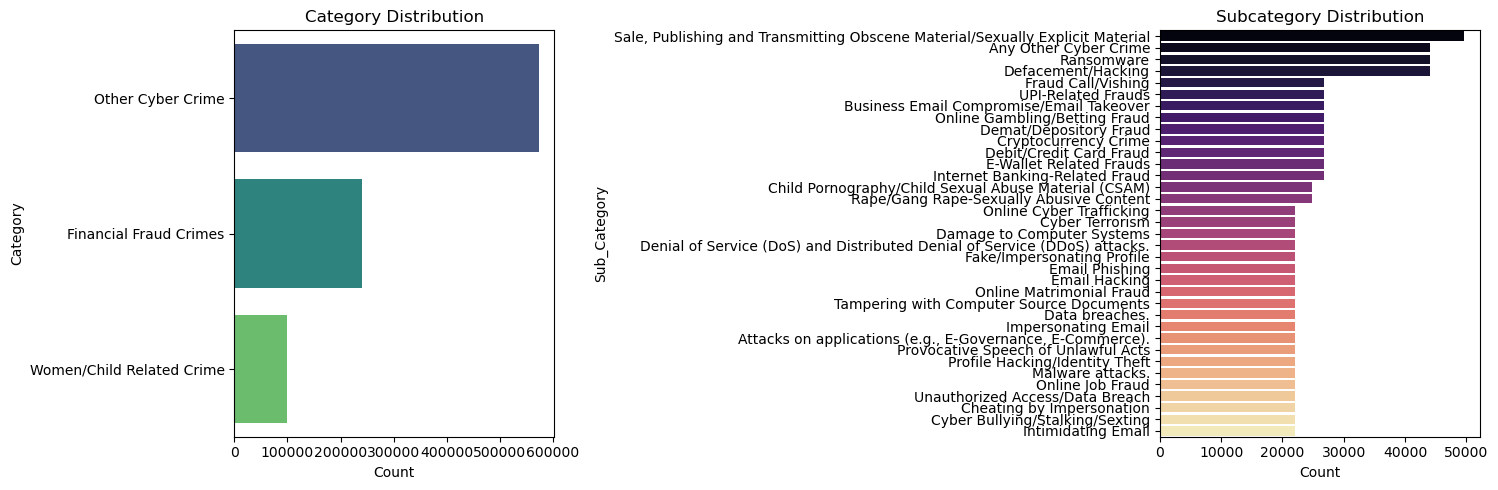

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Corrected sample data for categories and subcategories
category_data = {
    'Category': ['Other Cyber Crime', 'Financial Fraud Crimes', 'Women/Child Related Crime'],
    'Count': [573430, 241011, 99360]
}

subcategory_data = {
    'Sub_Category': [
        'Sale, Publishing and Transmitting Obscene Material/Sexually Explicit Material', 'Any Other Cyber Crime', 
        'Ransomware', 'Defacement/Hacking', 'Fraud Call/Vishing', 'UPI-Related Frauds', 
        'Business Email Compromise/Email Takeover', 'Online Gambling/Betting Fraud', 'Demat/Depository Fraud', 
        'Cryptocurrency Crime', 'Debit/Credit Card Fraud', 'E-Wallet Related Frauds', 'Internet Banking-Related Fraud', 
        'Child Pornography/Child Sexual Abuse Material (CSAM)', 'Rape/Gang Rape-Sexually Abusive Content', 
        'Online Cyber Trafficking', 'Cyber Terrorism', 'Damage to Computer Systems', 
        'Denial of Service (DoS) and Distributed Denial of Service (DDoS) attacks.', 'Fake/Impersonating Profile', 
        'Email Phishing', 'Email Hacking', 'Online Matrimonial Fraud', 'Tampering with Computer Source Documents', 
        'Data breaches.', 'Impersonating Email', 'Attacks on applications (e.g., E-Governance, E-Commerce).', 
        'Provocative Speech of Unlawful Acts', 'Profile Hacking/Identity Theft', 'Malware attacks.', 
        'Online Job Fraud', 'Unauthorized Access/Data Breach', 'Cheating by Impersonation', 
        'Cyber Bullying/Stalking/Sexting', 'Intimidating Email'
    ],
    'Count': [
        49680, 44110, 44110, 44110, 26779, 26779, 26779, 26779, 26779, 26779, 26779, 26779, 26779, 
        24840, 24840, 22055, 22055, 22055, 22055, 22055, 22055, 22055, 22055, 22055, 22055, 22055, 
        22055, 22055, 22055, 22055, 22055, 22055, 22055, 22055, 22055
    ]
}

# Convert to DataFrames
category_df = pd.DataFrame(category_data)
subcategory_df = pd.DataFrame(subcategory_data)

# Set up the matplotlib figure
plt.figure(figsize=(15, 5))

# Plot category distribution
plt.subplot(1, 2, 1)
sns.barplot(x='Count', y='Category', data=category_df, palette='viridis')
plt.title('Category Distribution')
plt.xlabel('Count')
plt.ylabel('Category')

# Plot subcategory distribution
plt.subplot(1, 2, 2)
sns.barplot(x='Count', y='Sub_Category', data=subcategory_df, palette='magma')
plt.title('Subcategory Distribution')
plt.xlabel('Count')
plt.ylabel('Sub_Category')

plt.tight_layout()

# Save the image
plt.savefig("category_subcategory_distribution.png", format='png', dpi=300)

# Display the plot
plt.show()


In [9]:
data =df

count    903306.000000
mean        327.546237
std         226.970423
min           1.000000
25%         157.000000
50%         262.000000
75%         458.000000
max        1499.000000
Name: text_length, dtype: float64


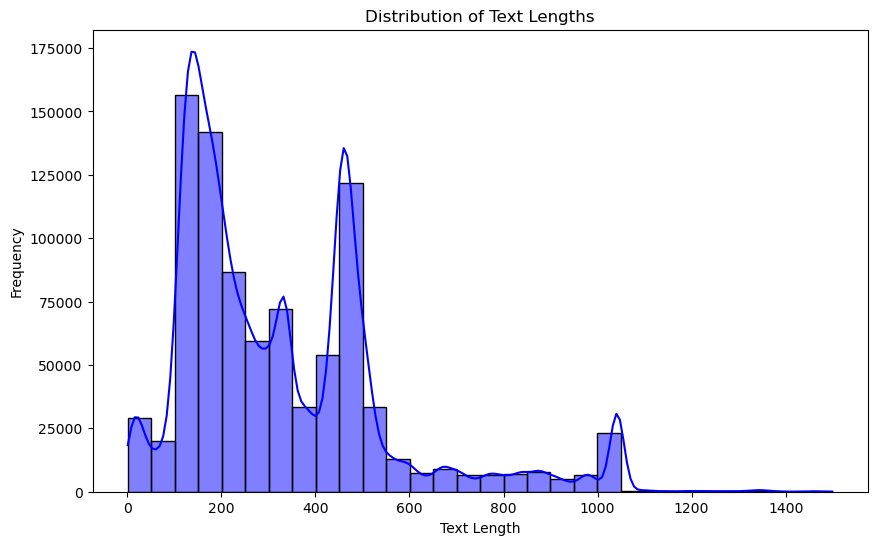

In [15]:
# Add a new column for text length
data['text_length'] = data['crimeaditionalinfo'].apply(len)

# Display basic statistics on text length
print(data['text_length'].describe())

# Plot the distribution of text length
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
# Save the image
plt.savefig("category_subcategory_distribution.png", format='png', dpi=300)

plt.ylabel('Frequency')
plt.show()

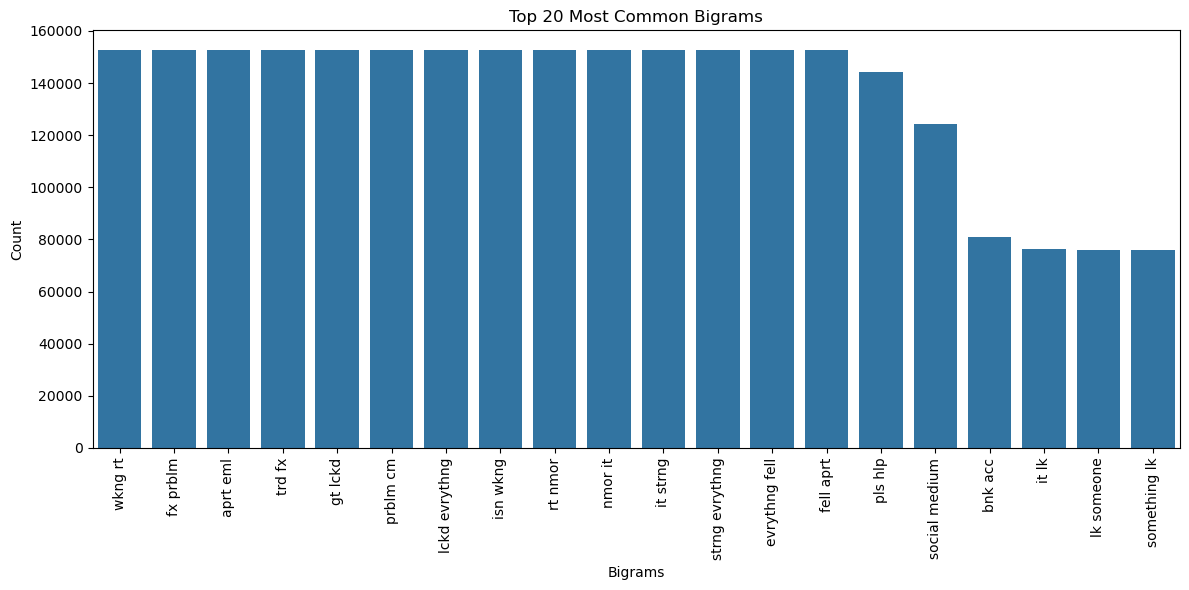

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_bigram(corpus, n=10):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

top_bigrams = get_top_n_bigram(df['crimeaditionalinfo'], 20)
words, counts = zip(*top_bigrams)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts))
plt.title('Top 20 Most Common Bigrams')
plt.xlabel('Bigrams')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [12]:
!pip install wordcloud

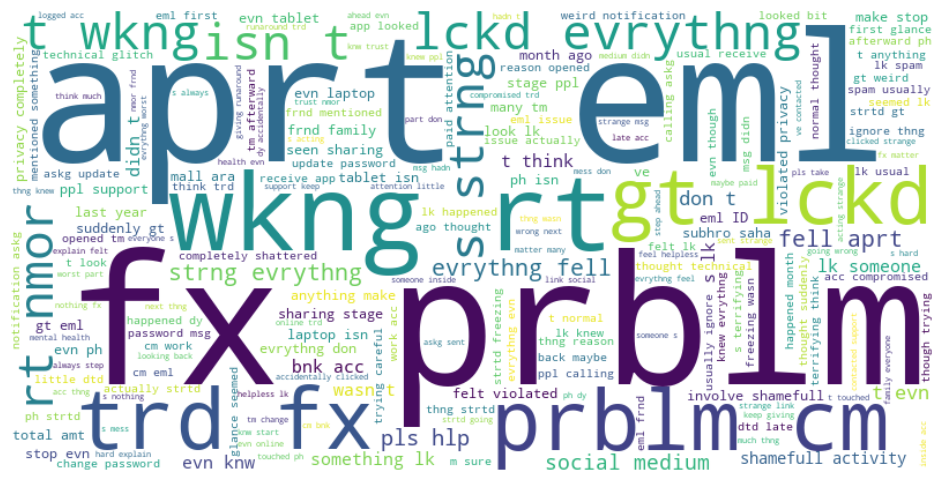

In [13]:
from wordcloud import WordCloud

# Combine all text into a single string
text = ' '.join(df['crimeaditionalinfo'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud.to_file('wordcloud.png')